In [23]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


path = 'C:/Users/asalj/OneDrive/Documents/Industrial/'  
all_files = glob.glob(path + "*.csv")

dfs = []
for file in all_files:
    try:
        df = pd.read_csv(file, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(file, encoding='latin1')
        except UnicodeDecodeError:
            df = pd.read_csv(file, encoding='utf-16')
    
   dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

merged_df.to_csv('merged_data.csv', index=False)

print("Data merged and saved to 'merged_data.csv'")

In [3]:
dff= pd.read_csv('/content/drive/MyDrive/merged_data.csv')

In [4]:
dff.head(4)

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8


In [5]:
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
Main Workers - Total - Persons,195145.0,1492.137518,45681.690979,0.0,6.0,28.0,188.0,15619759.0
Main Workers - Total - Males,195145.0,1193.171150,37739.170774,0.0,6.0,23.0,145.0,12801403.0
Main Workers - Total - Females,195145.0,298.966369,8582.018644,0.0,0.0,3.0,24.0,2818356.0
Main Workers - Rural - Persons,195145.0,660.618719,20444.364940,0.0,2.0,12.0,74.0,6770444.0
Main Workers - Rural - Males,195145.0,517.035312,16542.946109,0.0,1.0,8.0,56.0,5446541.0
Main Workers - Rural - Females,195145.0,143.583407,4314.446369,0.0,0.0,0.0,8.0,1323903.0
Main Workers - Urban - Persons,195145.0,831.518799,25867.811792,0.0,2.0,12.0,86.0,8849315.0
Main Workers - Urban - Males,195145.0,676.135837,21673.393792,0.0,1.0,9.0,67.0,7354862.0
Main Workers - Urban - Females,195145.0,155.382961,4531.592781,0.0,0.0,0.0,12.0,1494453.0
Marginal Workers - Total - Persons,195145.0,364.267186,11769.400296,0.0,0.0,4.0,28.0,3834122.0


In [6]:
new_dff= dff.copy()

new_dff.rename(columns={'Main Workers - Total -  Persons': 'Main_Total_Persons',
                       'Main Workers - Total - Males': 'Main_Total_Males',
                       'Main Workers - Total - Females': 'Main_Total_Females',
                       'Main Workers - Rural -  Persons': 'Main_Rural_Persons',
                       'Main Workers - Rural - Males': 'Main_Rural_Males',
                       'Main Workers - Rural - Females': 'Main_Rural_Females',
                       'Main Workers - Urban -  Persons': 'Main_Urban_Persons',
                       'Main Workers - Urban - Males': 'Main_Urban_Males',
                       'Main Workers - Urban - Females': 'Main_Urban_Females'}, inplace=True)

new_dff.rename(columns={'Marginal Workers - Total -  Persons': 'Marginal_Total_Persons',
                       'Marginal Workers - Total - Males': 'Marginal_Total_Males',
                       'Marginal Workers - Total - Females': 'Marginal_Total_Females',
                       'Marginal Workers - Rural -  Persons': 'Marginal_Rural_Persons',
                       'Marginal Workers - Rural - Males': 'Marginal_Rural_Males',
                       'Marginal Workers - Rural - Females': 'Marginal_Rural_Females',
                       'Marginal Workers - Urban -  Persons': 'Marginal_Urban_Persons',
                       'Marginal Workers - Urban - Males': 'Marginal_Urban_Males',
                       'Marginal Workers - Urban - Females': 'Marginal_Urban_Females'}, inplace=True)


In [7]:
new_dff.replace(0, np.nan, inplace=True)

In [8]:
new_dff.isnull().sum()

State Code                     0
District Code                  0
India/States                   0
Division                       0
Group                          0
Class                          0
NIC Name                       0
Main_Total_Persons          6862
Main_Total_Males           13491
Main_Total_Females         75770
Main_Rural_Persons         40562
Main_Rural_Males           46976
Main_Rural_Females        107030
Main_Urban_Persons         41423
Main_Urban_Males           48121
Main_Urban_Females        100032
Marginal_Total_Persons     68249
Marginal_Total_Males       80028
Marginal_Total_Females    113703
Marginal_Rural_Persons     93466
Marginal_Rural_Males      104070
Marginal_Rural_Females    132339
Marginal_Urban_Persons    105785
Marginal_Urban_Males      116401
Marginal_Urban_Females    139750
dtype: int64

In [9]:
cleaned_df= new_dff.dropna(axis='index')

In [10]:
cleaned_df.isnull().sum()

State Code                0
District Code             0
India/States              0
Division                  0
Group                     0
Class                     0
NIC Name                  0
Main_Total_Persons        0
Main_Total_Males          0
Main_Total_Females        0
Main_Rural_Persons        0
Main_Rural_Males          0
Main_Rural_Females        0
Main_Urban_Persons        0
Main_Urban_Males          0
Main_Urban_Females        0
Marginal_Total_Persons    0
Marginal_Total_Males      0
Marginal_Total_Females    0
Marginal_Rural_Persons    0
Marginal_Rural_Males      0
Marginal_Rural_Females    0
Marginal_Urban_Persons    0
Marginal_Urban_Males      0
Marginal_Urban_Females    0
dtype: int64

In [11]:
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Main_Total_Persons,27873.0,9357.971119,120134.273936,6.0,422.0,1228.0,3852.0,15619759.0
Main_Total_Males,27873.0,7436.669393,99265.547087,3.0,272.0,855.0,2892.0,12801403.0
Main_Total_Females,27873.0,1921.301726,22557.587810,2.0,69.0,211.0,715.0,2818356.0
Main_Rural_Persons,27873.0,4302.131238,53950.255341,2.0,183.0,556.0,1752.0,6770444.0
Main_Rural_Males,27873.0,3347.279697,43663.260871,1.0,120.0,388.0,1312.0,5446541.0
Main_Rural_Females,27873.0,954.851541,11381.605410,1.0,26.0,88.0,324.0,1323903.0
Main_Urban_Persons,27873.0,5055.839881,67516.306960,2.0,155.0,516.0,1854.0,8849315.0
Main_Urban_Males,27873.0,4089.389696,56596.109350,1.0,101.0,360.0,1410.0,7354862.0
Main_Urban_Females,27873.0,966.450185,11801.983651,1.0,26.0,87.0,321.0,1494453.0
Marginal_Total_Persons,27873.0,2399.151437,31023.260454,4.0,84.0,238.0,782.0,3834122.0


In [12]:
cleaned_df.count()

State Code                27873
District Code             27873
India/States              27873
Division                  27873
Group                     27873
Class                     27873
NIC Name                  27873
Main_Total_Persons        27873
Main_Total_Males          27873
Main_Total_Females        27873
Main_Rural_Persons        27873
Main_Rural_Males          27873
Main_Rural_Females        27873
Main_Urban_Persons        27873
Main_Urban_Males          27873
Main_Urban_Females        27873
Marginal_Total_Persons    27873
Marginal_Total_Males      27873
Marginal_Total_Females    27873
Marginal_Rural_Persons    27873
Marginal_Rural_Males      27873
Marginal_Rural_Females    27873
Marginal_Urban_Persons    27873
Marginal_Urban_Males      27873
Marginal_Urban_Females    27873
dtype: int64

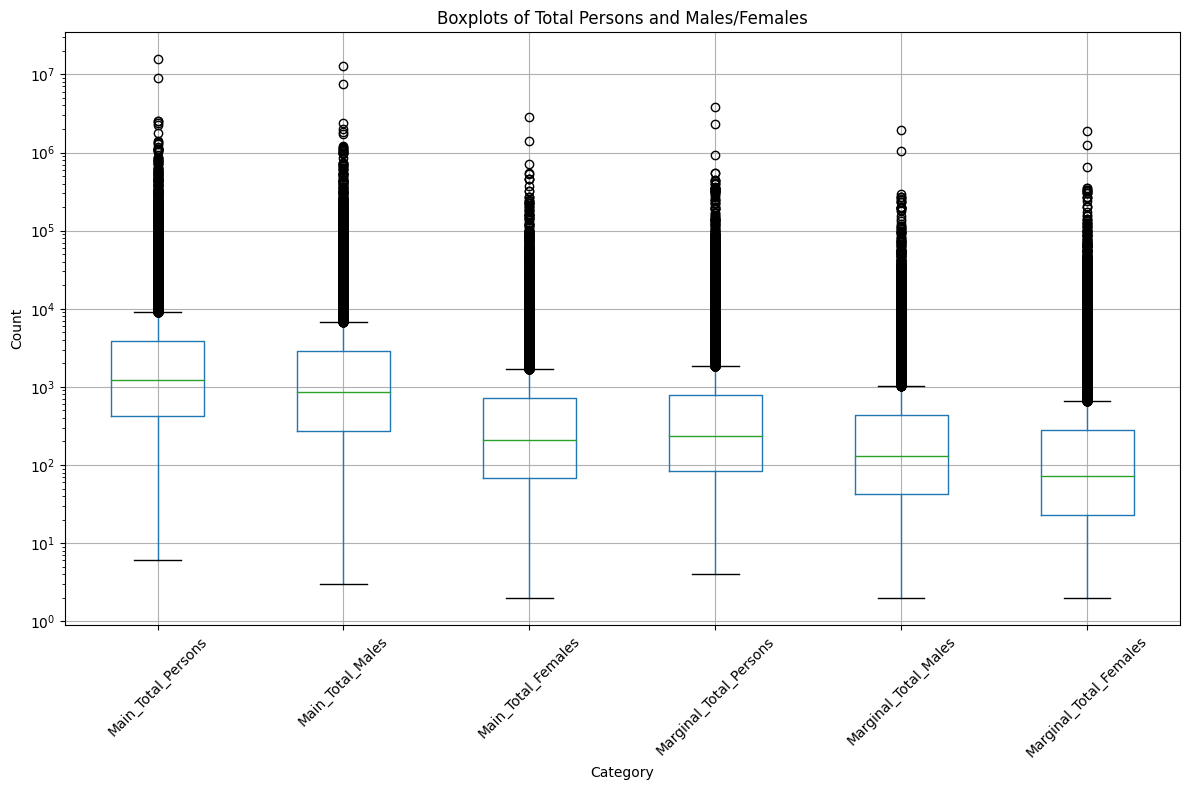

In [15]:
import matplotlib.pyplot as plt


columns_to_plot = [
    'Main_Total_Persons', 'Main_Total_Males', 'Main_Total_Females',
    'Marginal_Total_Persons', 'Marginal_Total_Males', 'Marginal_Total_Females'
]

# Create boxplots for each column
plt.figure(figsize=(12, 8))
cleaned_df[columns_to_plot].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots of Total Persons and Males/Females')
plt.ylabel('Count')
plt.xlabel('Category')
plt.yscale('log')
plt.tight_layout()
plt.show()


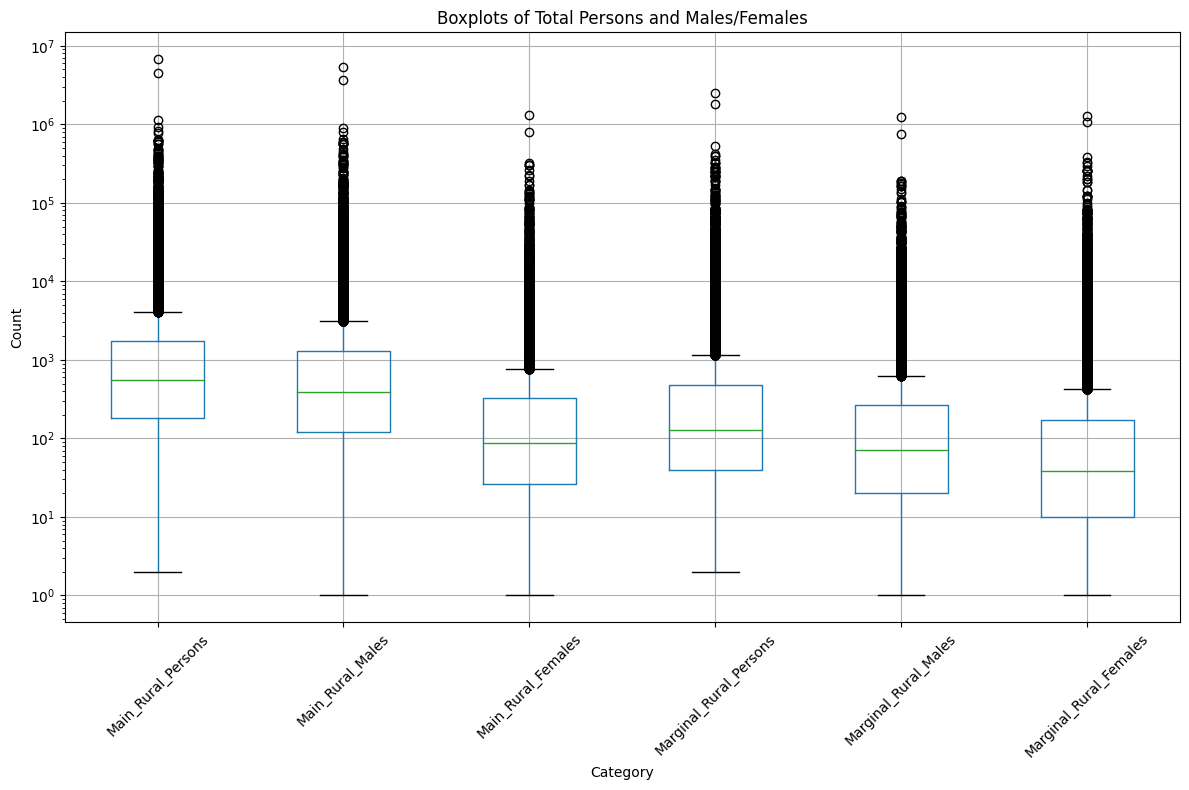

In [16]:
import matplotlib.pyplot as plt


columns_to_plot2 = [
    'Main_Rural_Persons', 'Main_Rural_Males', 'Main_Rural_Females',
    'Marginal_Rural_Persons', 'Marginal_Rural_Males', 'Marginal_Rural_Females'
]

# Create boxplots for each column
plt.figure(figsize=(12, 8))
cleaned_df[columns_to_plot2].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots of Total Persons and Males/Females')
plt.ylabel('Count')
plt.xlabel('Category')
plt.yscale('log')
plt.tight_layout()
plt.show()





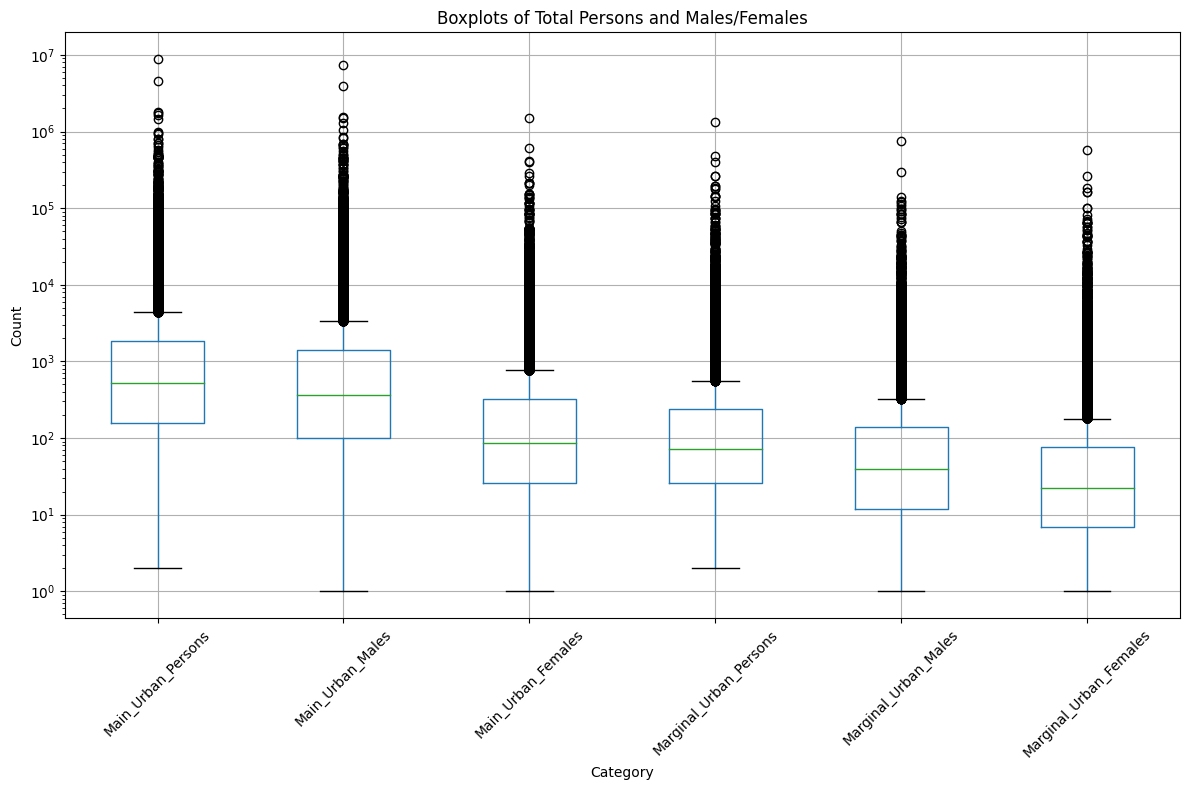

In [17]:
import matplotlib.pyplot as plt


columns_to_plot3 = [
    'Main_Urban_Persons', 'Main_Urban_Males', 'Main_Urban_Females',
    'Marginal_Urban_Persons', 'Marginal_Urban_Males', 'Marginal_Urban_Females'
]

# Create boxplots for each column
plt.figure(figsize=(12, 8))
cleaned_df[columns_to_plot3].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots of Total Persons and Males/Females')
plt.ylabel('Count')
plt.xlabel('Category')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [19]:
def replace_outliers_central(df, columns, method='median'):
  df_new = cleaned_df.copy()
  for col in columns:
    if df[col].dtype not in ['int64', 'float64']:
      continue  # Skip non-numeric columns
    # Detect outliers using IQR (you can use z-scores as well)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Choose replacement method
    if method == 'mean':
      replacement = df[col].mean()
    elif method == 'median':
      replacement = df[col].median()
    else:
      replacement = df[col].mode()[0]  # Assuming unique mode exists
    # Replace outliers
    df_new.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = replacement
  return df_new

# Example usage with median replacement
df_replaced = replace_outliers_central(cleaned_df.copy(), columns=['Main_Total_Persons', 'Main_Total_Males', 'Main_Total_Females',
                                                                   'Marginal_Total_Persons', 'Marginal_Total_Males', 'Marginal_Total_Females',
                                                                   'Main_Rural_Persons', 'Main_Rural_Males', 'Main_Rural_Females',
                                                                   'Marginal_Rural_Persons', 'Marginal_Rural_Males', 'Marginal_Rural_Females',
                                                                   'Main_Urban_Persons', 'Main_Urban_Males', 'Main_Urban_Females',
                                                                   'Marginal_Urban_Persons', 'Marginal_Urban_Males', 'Marginal_Urban_Females'], method='median')
print(df_replaced)

       State Code District Code                India/States Division Group  \
0             `07          `000        STATE - NCT OF DELHI      `00  `000   
1             `07          `000        STATE - NCT OF DELHI      `01  `000   
2             `07          `000        STATE - NCT OF DELHI      `01  `011   
69            `07          `000        STATE - NCT OF DELHI      `10  `000   
101           `07          `000        STATE - NCT OF DELHI      `13  `000   
...           ...           ...                         ...      ...   ...   
195138        `19          `345  District - Purba Medinipur      `99  `000   
195141        `19          `345  District - Purba Medinipur      `99  `991   
195142        `19          `345  District - Purba Medinipur      `99  `991   
195143        `19          `345  District - Purba Medinipur      `99  `992   
195144        `19          `345  District - Purba Medinipur      `99  `992   

        Class                                           NIC Nam

In [21]:
df_replaced.count()

State Code                27873
District Code             27873
India/States              27873
Division                  27873
Group                     27873
Class                     27873
NIC Name                  27873
Main_Total_Persons        27873
Main_Total_Males          27873
Main_Total_Females        27873
Main_Rural_Persons        27873
Main_Rural_Males          27873
Main_Rural_Females        27873
Main_Urban_Persons        27873
Main_Urban_Males          27873
Main_Urban_Females        27873
Marginal_Total_Persons    27873
Marginal_Total_Males      27873
Marginal_Total_Females    27873
Marginal_Rural_Persons    27873
Marginal_Rural_Males      27873
Marginal_Rural_Females    27873
Marginal_Urban_Persons    27873
Marginal_Urban_Males      27873
Marginal_Urban_Females    27873
dtype: int64

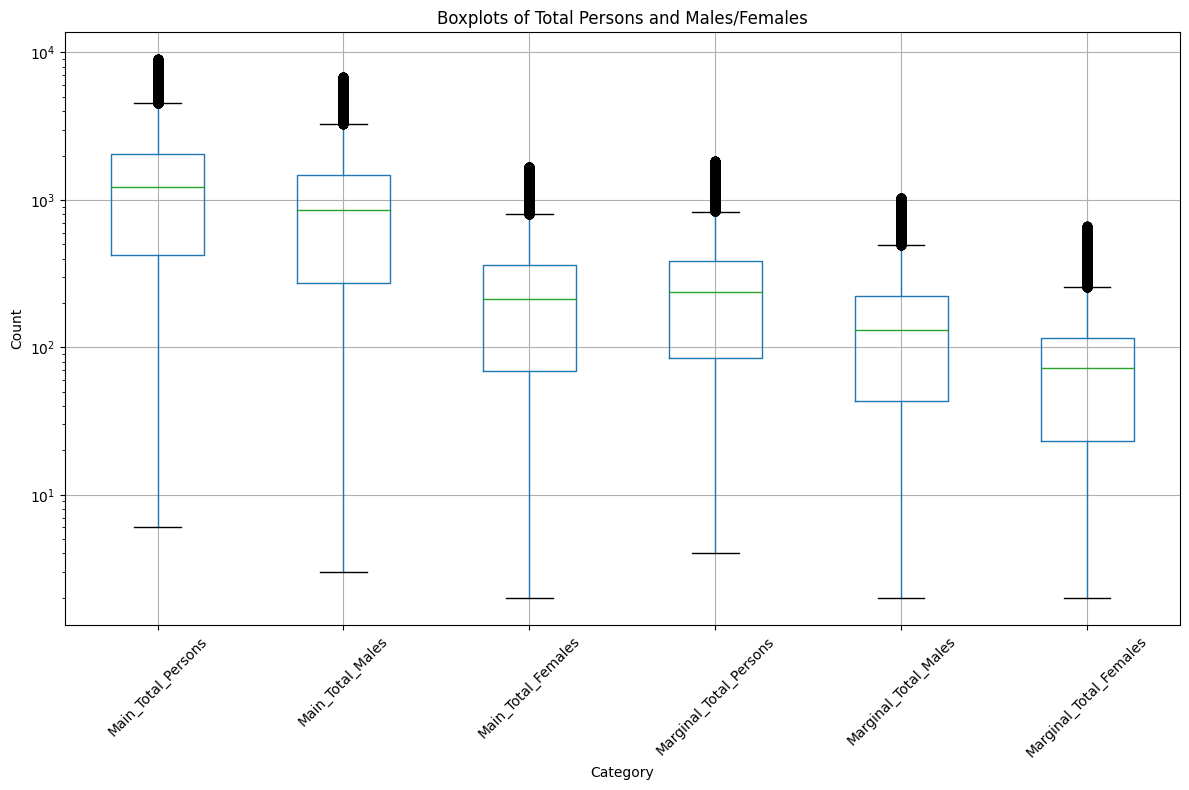

In [22]:

columns_to_plot = [
    'Main_Total_Persons', 'Main_Total_Males', 'Main_Total_Females',
    'Marginal_Total_Persons', 'Marginal_Total_Males', 'Marginal_Total_Females'
]

# Create boxplots for each column
plt.figure(figsize=(12, 8))
df_replaced[columns_to_plot].boxplot()
plt.xticks(rotation=45)
plt.title('Boxplots of Total Persons and Males/Females')
plt.ylabel('Count')
plt.xlabel('Category')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [26]:

def remove_outliers_zscore(df, columns, threshold=3):
  dff3 = df_replaced.copy()
  for col in columns:
    if df[col].dtype not in ['int64', 'float64']:
      continue  # Skip non-numeric columns
    z_scores = stats.zscore(df[col])
    dff3 = dff3.loc[np.abs(z_scores) <= threshold]
  return dff3

# Example usage
df_without_outliers = remove_outliers_zscore(df_replaced.copy(), columns=['Main_Total_Persons', 'Main_Total_Males', 'Main_Total_Females',
                                                                   'Marginal_Total_Persons', 'Marginal_Total_Males', 'Marginal_Total_Females',
                                                                   'Main_Rural_Persons', 'Main_Rural_Males', 'Main_Rural_Females',
                                                                   'Marginal_Rural_Persons', 'Marginal_Rural_Males', 'Marginal_Rural_Females',
                                                                   'Main_Urban_Persons', 'Main_Urban_Males', 'Main_Urban_Females',
                                                                   'Marginal_Urban_Persons', 'Marginal_Urban_Males', 'Marginal_Urban_Females'])
print(df_without_outliers)

       State Code District Code                India/States Division Group  \
0             `07          `000        STATE - NCT OF DELHI      `00  `000   
1             `07          `000        STATE - NCT OF DELHI      `01  `000   
2             `07          `000        STATE - NCT OF DELHI      `01  `011   
112           `07          `000        STATE - NCT OF DELHI      `14  `000   
113           `07          `000        STATE - NCT OF DELHI      `14  `141   
...           ...           ...                         ...      ...   ...   
195104        `19          `345  District - Purba Medinipur      `94  `000   
195119        `19          `345  District - Purba Medinipur      `95  `952   
195130        `19          `345  District - Purba Medinipur      `97  `000   
195131        `19          `345  District - Purba Medinipur      `97  `970   
195132        `19          `345  District - Purba Medinipur      `97  `970   

        Class                                           NIC Nam